## outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
data= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

outliers=[]

def detect_outliers(data):
    threshhold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshhold:
            outliers.append(i)
    return outliers

In [51]:
detect_outliers(data)

[102, 107, 108]

In [26]:
outliers

[]

IQR

1. sort the data
2. calculate q1 and q3
3. IQR(q3-q1)
4. find the lower fence (q1-1.5(iqr))
5. find the upper fence (q1+1.5(iqr))

In [27]:
dataset=sorted(data)

In [28]:
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [29]:
q1,q3=np.percentile(dataset,[25,75])

In [32]:
print(q1,q3)

12.0 15.0


In [33]:
iqr=q3-q1

In [35]:
## find lower fence
lower=q1-1.5*iqr
higher=q3+1.5*iqr

In [36]:
print(lower,higher)

7.5 19.5


In [37]:
outlier=[]
for i in dataset:
    if i<7.5 or i>19.5:
        outlier.append(i)
        

In [38]:
outlier

[102, 107, 108]

In [44]:
for i in outlier:
    dataset.remove(i)

In [46]:
import seaborn as sns

C:\Users\samcs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

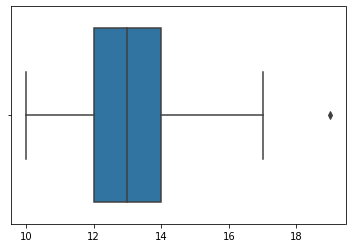

In [47]:
sns.boxplot(dataset)